# Finance Data Project 

In this project, the focus is on exploratory data analysis of stock prices.
____
The focus is on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set_style('whitegrid')
%matplotlib inline

## Data

We will use the stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [ ]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [2]:
#Create a list of the ticker symbols (as strings) in alphabetical order
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
# Concatenate the bank dataframes together to a single data frame
bs_df = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [3]:
bs_df = pd.read_pickle('all_banks') 

In [5]:
# Set the column name levels
bs_df.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bs_df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)


In [7]:
# Max close price for BAC's stock throughout the time period
bs_df['BAC']['Close'].max()

54.9

In [8]:
# Max close price for each bank's stock throughout the time period
for tick in tickers:
    print(tick,'-' ,bs_df[tick]['Close'].max())

BAC - 54.9
C - 564.1
GS - 247.92
JPM - 70.08
MS - 89.3
WFC - 58.52


In [9]:
# Max close price for each bank's stock throughout the time period Using .xs
bs_df.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [10]:
# Create a new empty DataFrame called returns
returns= pd.DataFrame()

This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value
bs_df['BAC']['Close'].pct_change().head()

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
Name: Close, dtype: float64

In [12]:
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column
for tick in tickers:
    returns[tick+' Returns'] =bs_df[tick]['Close'].pct_change()

In [13]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


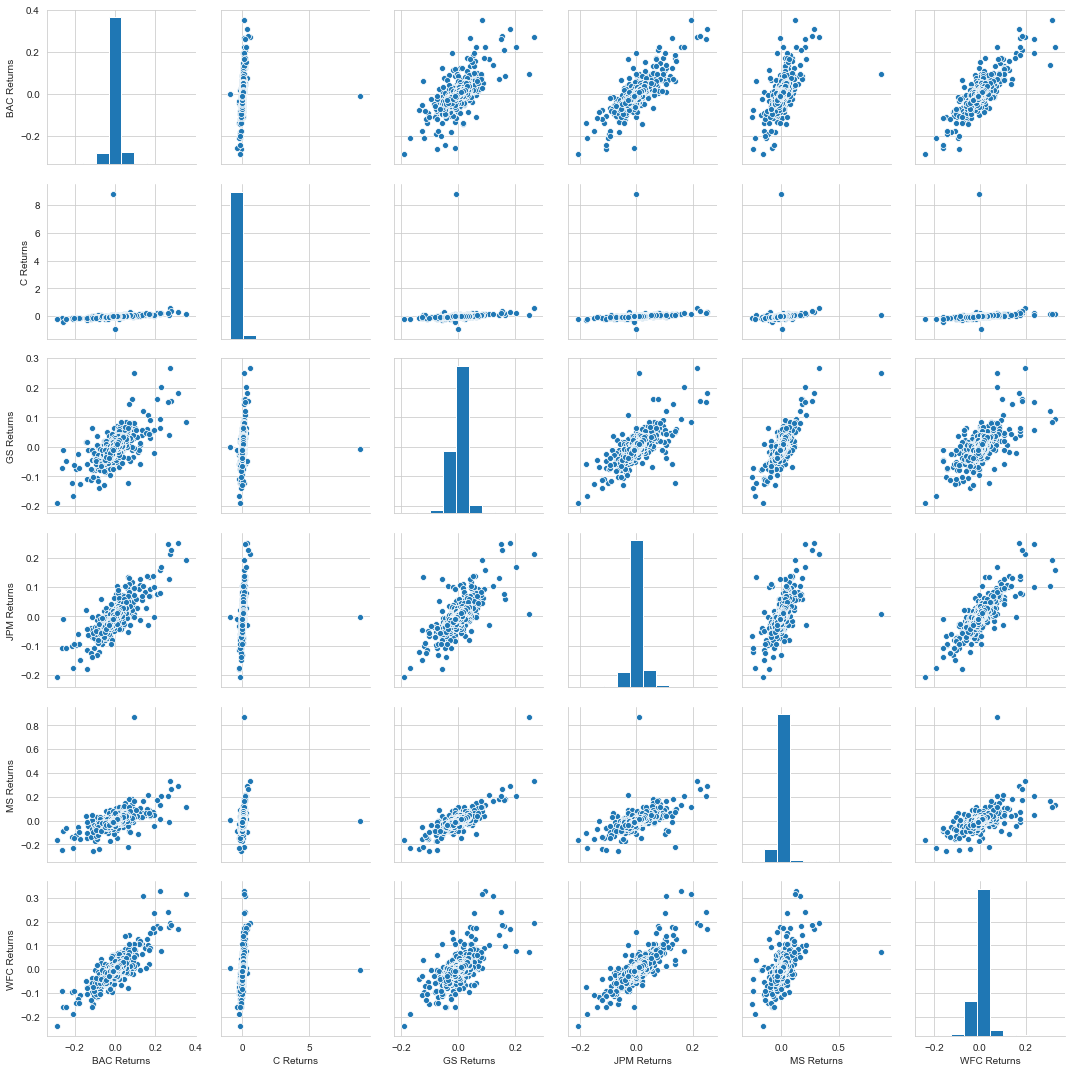

In [14]:
# Pairplot of returns dataset
sns.pairplot(returns[1:]) # because the first row is Nan

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

In [15]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [16]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

We notice that Citigroup's largest drop and biggest gain were very close to one another. In that time frame, something significant happened,

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [18]:
# Taking a look at the standard deviation of the returns, we can figure the Riskiest stock over the entire time period
returns.std() 
# Citigroup is the riskiest

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

In [20]:
# Riskiest for the year 2015
returns.loc['2015-01-01':'2015-12-31'].std() 
# Very similar risk profiles, but Morgan Stanley and BoA are higher

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



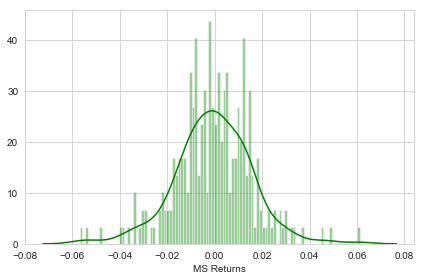

In [29]:
# Distplot of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],color='green',bins=100)
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



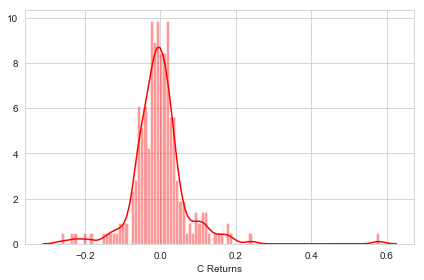

In [28]:
# # Distplot of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'],color='red',bins=100)
plt.tight_layout()

____
### Visualization using Plotly and Cufflinks

In [23]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

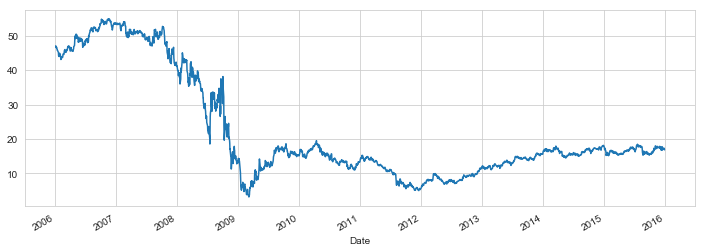

In [33]:
# Visualizing a line plot showing Close price for each bank for the entire index of time
bs_df['BAC']['Close'].plot(figsize=(12,4),label='BAC')

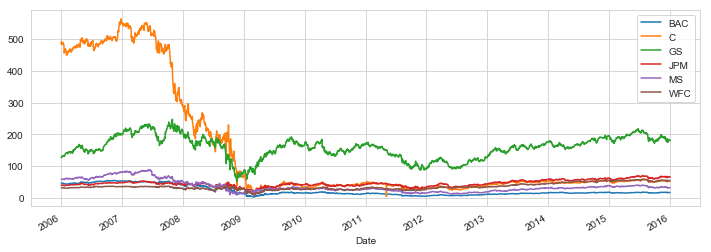

In [34]:
for tick in tickers:
    bs_df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

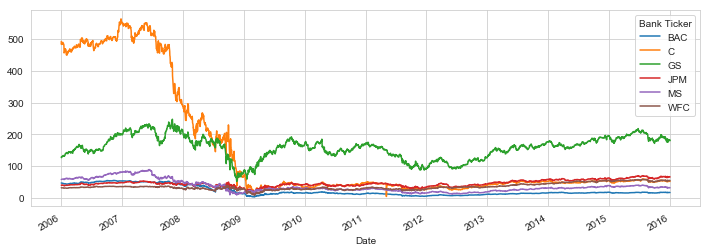

In [37]:
# Visualizing a line plot showing Close price for each bank for the entire index of time using [.xs]
bs_df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [38]:
# Visualizing a line plot showing Close price for each bank for the entire index of time using plotly
bs_df.xs(key='Close',axis=1,level='Stock Info').iplot()

#### Moving Averages

In [59]:
# Analyzing the moving averages for these stocks in the year 2008.
bs_df['BAC'].head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


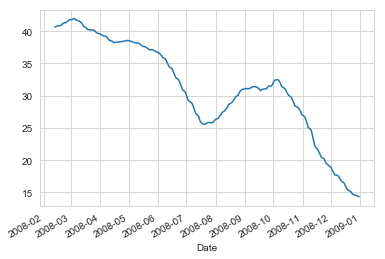

In [43]:
bs_df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30Day MovingAverage')

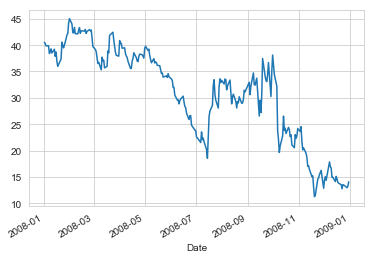

In [44]:
bs_df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')

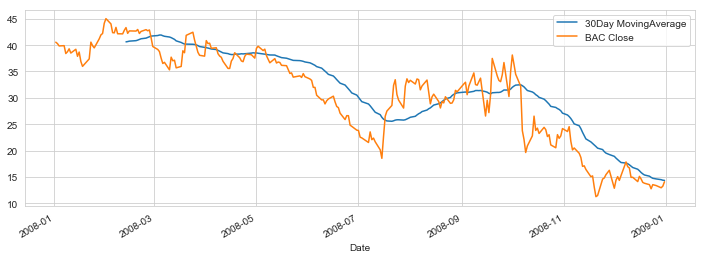

In [45]:
## Plot the rolling 30 day average against the Close Price for Bank Of America's stock for 2008
plt.figure(figsize=(12,4))
bs_df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30Day MovingAverage')
bs_df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

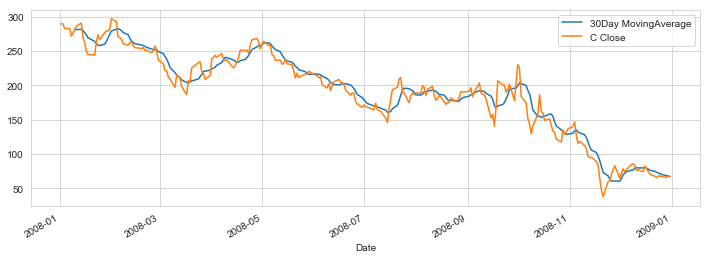

In [46]:
## Plot the rolling weekly average against the Close Price for CitiGroup's stock for 2008
plt.figure(figsize=(12,4))
bs_df['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=7).mean().plot(label='Weekly MovingAverage')
bs_df['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'C Close')
plt.legend()

In [49]:
bs_df.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


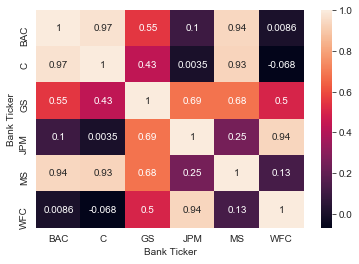

In [50]:
# Create a heatmap of the correlation between the stocks Close Price
sns.heatmap(bs_df.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

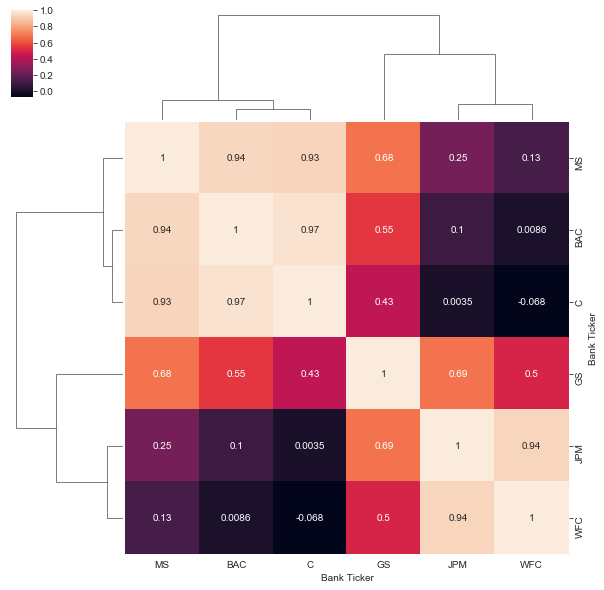

In [51]:
# Using clustermap to cluster the correlations together
sns.clustermap(bs_df.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

The Clustermap grouped [C, BAC, MS] together and their correlation in one group and the other remaining stocks in another group.

JP Morgan & WellsFargo are most correlated with each other as well as MorganStaley & BankOfAmerica

_____

#### Using the cufflinks library to create some Technical Analysis plots.

In [52]:
close_corr = bs_df.xs(key='Close',axis=1,level='Stock Info').corr()

In [53]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [54]:
# Visulaize a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016
BAC = bs_df.xs(key='BAC',axis=1,level='Bank Ticker')

In [55]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

In [56]:
bac15.iplot(kind='candle')

In [57]:
# Using a Technical Analysis Plot to create a Simple Moving Averages plot of Morgan Stanley for the year 2015
bs_df['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [58]:
# Using a Technical Analysis Plot to create a Bollinger Band Plot for Bank of America for the year 2015
bs_df['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

Bollinger Band Plot gives the SMA, Upper and Lower band along with the closing price of the Stock